<a href="https://colab.research.google.com/github/LauraMBJ/Proyecto_II/blob/main/Proyecto_II_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.pipeline import make_pipeline

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.compose import make_column_selector, make_column_transformer

# Regresion Lineal
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

# Import the bagging regressor
from sklearn.ensemble import BaggingRegressor

# Regresor de bosque aleatorio
from sklearn.ensemble import RandomForestRegressor

#Clasificacion
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import set_config
set_config(display='diagram')

#métricas para evaluar modelos de regresión
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, RocCurveDisplay

from sklearn.metrics import classification_report

#Matriz de Confusion
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

# Visualizando árbol de decisión
from sklearn import tree

#importar dataset de sklearn
from sklearn.datasets import load_iris


#Modelos No Supervisados
from sklearn.cluster import KMeans
#métricas de evaluacion de agrupamiento
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

#dendogrma
import scipy.cluster.hierarchy as sch

#PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

#Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler




# **Segunda opción: conjunto de datos 2**

**1) Fuente de datos**
https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

**2) Breve descripción de datos**

El dataset contien las ventas históricas de la empresa de supermercados que ha registrado en 3 sucursales diferentes durante 3 meses.

In [141]:
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv', index_col= 'Invoice ID')
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**3) ¿Cuál es el objetivo?**

El desarrollo de modelos para la prediccion de los ingresos brutos e incluso la clasificacion teniendo en cuenta datos como el genero, la ciudad, el tipo de cliente, entre otros


**4) ¿Este es un problema de clasificación o regresión?**

Se puede enfocar como regresion si queremos predecir los posibles ingresos brutos. Como clasificacion si tenemos como target la columna de Branch o city

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income

# **Introducción y antecedentes del conjunto de datos**

**Invoice id:** Número de identificación de factura/ comprobante de venta generado por computadora

**Branch:**
Sucursal de supercentro (se dispone de 3 sucursales identificadas por A, B y C).

**City:** Ubicación de los supercentros

**Customer type:** Tipo de clientes, registrada por socios para los clientes que usan tajeta de membresia y los que no usan

**Gender:** Genero de cada cliente

**Product line:** Grupos generales de categorización de artículos: accesorios electrónicos, accesorios de moda, alimentos y bebidas, salud y belleza, hogar y estilo de vida, deportes y viajes

**Unit price:** Precio de cada producto en $

**Quantity:** Número de productos comprados por el cliente

**Tax:** Tasa de impuestos del 5% para la compra del cliente

**Total:** Total del precio incluido el impuesto

**Date:** Fecha de compra (Registro disponible desde enero 2019 hasta marzo 2019)

**Time:** 
Hora de compra (10am a 9pm)

**Payment:**Pago utilizado por el cliente para la compra (hay 3 métodos disponibles: efectivo, tarjeta de crédito y billetera electrónica)

**COGS:** Costo de los bienes vendidos

**Gross margin percentage:** Porcentaje de margen bruto

**Gross income:** Ingresos brutos

**Rating:** Calificación del cliente en su experiencia de compra (en una escala del 1 al 10)



**5) ¿Cuántas características hay?**
Inicialmente tenemos 15 caracteristicas.

**6) ¿Cuántas filas de datos hay?**
Tenemos 1000 filas de datos.


In [143]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


**7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?**

En cuanto a la limpieza revisar sirealmente todas las caracteristicas presentes son relevantes. Afortunadamente no tenemis valores nulos ni en cero.

Uno de los retos para modelar es la identificacion y transformacion de los datos.

In [144]:
df.duplicated().sum()
#No tenemos datos duplicados

0

In [145]:
df.nunique()

Branch                       3
City                         3
Customer type                2
Gender                       2
Product line                 6
Unit price                 943
Quantity                    10
Tax 5%                     990
Total                      990
Date                        89
Time                       506
Payment                      3
cogs                       990
gross margin percentage      1
gross income               990
Rating                      61
dtype: int64

In [146]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [147]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [148]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [149]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [150]:
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [151]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

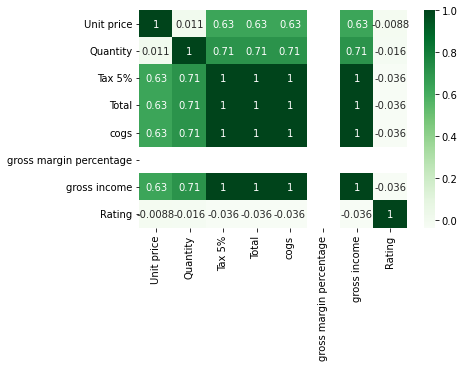

In [152]:
corr=df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

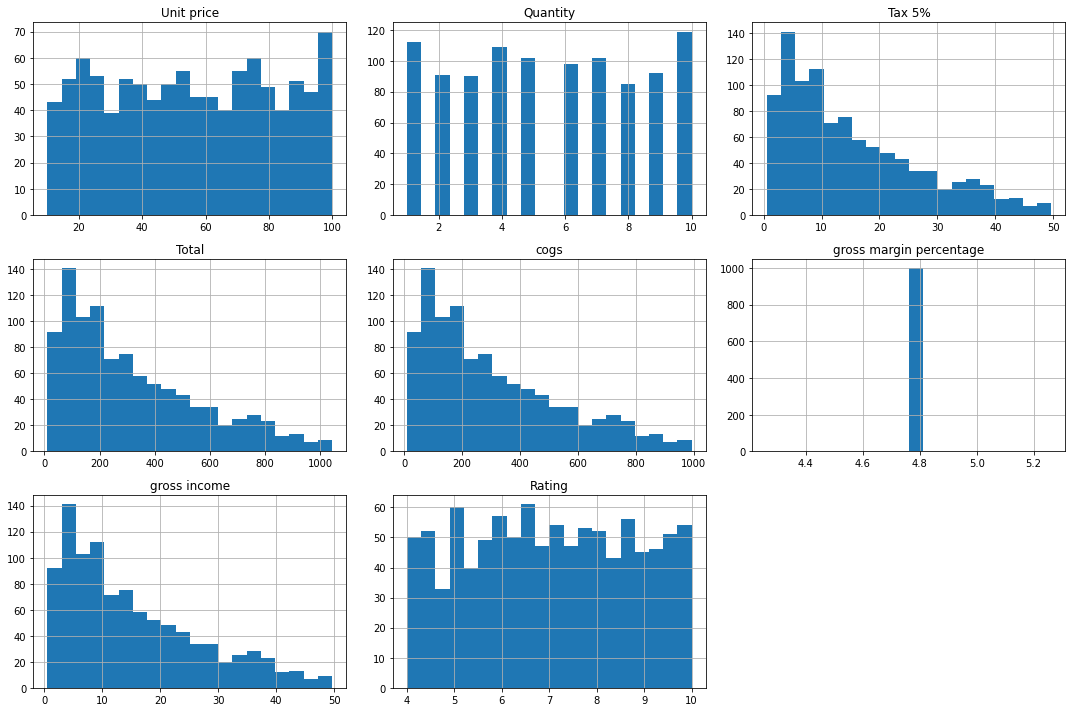

In [153]:
df.hist(bins=20,figsize=(15,10))
plt.tight_layout()
plt.show()


# **Explicación de los pasos de limpieza requeridos y una breve explicación de cómo los abordaste en tu conjunto de datos.**

En cuanto a la limpieza, revise cada caracteristica presente intentando determinar su relevacia en el dataset. 

Afortunadamente no tenia valores nulos ni en cero.

Tanto el diagrama de correlacion como las graficas anteriores muestran un relacion muy estrecha entre las variables.

Teniendo en cuenta que la columna de "Tax 5%" y la de "Gross Income" tienen las mismas medidas estadisticas(media, mediana...) y por ende el mismo comportamiento, decicidí eliminar una de las columnas.

In [154]:
df.columns.values

array(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'], dtype=object)

In [155]:
df=df.drop(columns='gross income')
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,Rating
Invoice ID,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,5.3


In [156]:
f1=df.groupby(by=['Branch','City']).mean()
f1

,,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,Rating
Branch,City,,,,,,,
A,Yangon,54.780853,5.467647,14.874001,312.354031,297.480029,4.761905,7.027059
B,Mandalay,55.659277,5.481928,15.232024,319.872506,304.640482,4.761905,6.818072
C,Naypyitaw,56.609024,5.582317,16.052367,337.099715,321.047348,4.761905,7.072866


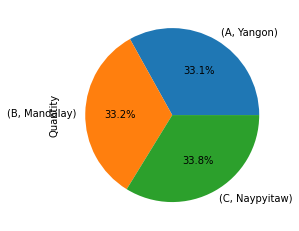

In [158]:
f1.Quantity.plot.pie(autopct='%1.1f%%');

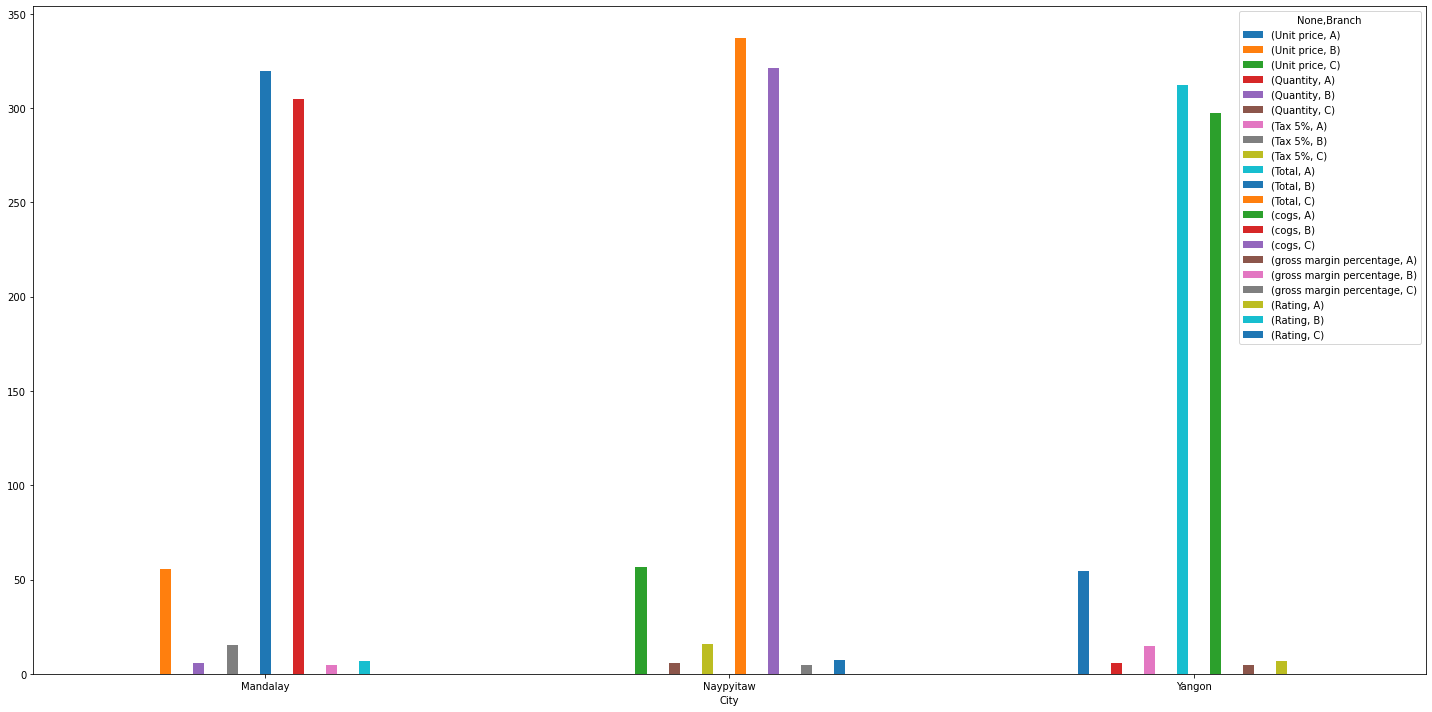

In [231]:
# fig, ax = plt.subplots()
# fig.set_size_inches(8, 8)
# pd.plotting.radviz(f1, f1.index['Branch'], ax = ax);
ax = f1.unstack(level=0).plot(kind='bar', subplots=False, rot=0, figsize=(20, 10), layout=(5, 5))
plt.tight_layout()

El comportamiento del "Branch" entre las diferentes ciudades es muy similar.

Cabe resaltar que aunque los precios en la ciudad de Naypaytaw son un poco mayores en comparacion con los otros, esta es la ciudad que registra más ventas, asi mismo podriamos afirmar que la diferencia radica en el servicio al cliente, lo anterior por supuesto validado con el Rating de cada Branch

In [212]:
f2=df.pivot_table(index = ["Gender", "Customer type"], columns = "Quantity", values = "Total")
f2
# sns.boxplot(x='Quantity', y='Total', data=f2)

Quantity                     1           2           3           4   \
Gender Customer type                                                  
Female Member         58.116288  113.646000  185.977313  224.740600   
       Normal         44.027053  122.608957  175.959000  243.564720   
Male   Member         61.765742  118.819909  196.432425  236.422065   
       Normal         60.557583  126.967680  162.009931  221.195739   

Quantity                      5           6           7           8   \
Gender Customer type                                                   
Female Member         253.851196  342.711783  448.195650  459.164000   
       Normal         264.447273  380.622667  410.273132  528.300000   
Male   Member         266.164500  383.656737  396.417000  501.110400   
       Normal         277.712500  310.570448  440.588859  415.537043   

Quantity                      9           10  
Gender Customer type                          
Female Member         550.358224  596.295000  
       Normal         501.732000  536.524655  
Male   Member         533.267795  560.949828  
       Normal         538.886250  660.302222

# **Realizar una división train-test en tus datos**

In [159]:
#Division de la validacion
X = df.drop(columns='Branch', axis=1)
y = df['Branch']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,Rating
Invoice ID,,,,,,,,,,,,,,
750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,9.1
226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,9.6
631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,7.4
123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,8.4
373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,6.2
303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,4.4
727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,7.7


# **Utilice un transformador de columna para escalar las características numéricas y realizar una codificación one-hot a las características categóricas.**


In [160]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [161]:
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [162]:
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [163]:
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [164]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1f99c41340>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1f99c41190>)])

In [165]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1f99c41340>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1f99c41190>)])

In [166]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [167]:
# Comprobar los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (750, 560)




array([[-1.37121173,  0.84832728, -0.64980886, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.81571646,  1.5269891 ,  2.02198793, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.14114349,  0.50899637,  0.47815215, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.18446268, -1.5269891 , -0.94549644, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.67904784,  1.18765819,  2.57712793, ...,  0.        ,
         0.        ,  1.        ],
       [-1.22554363,  1.18765819, -0.41567739, ...,  1.        ,
         0.        ,  0.        ]])

In [168]:
# Mantener los nombres de las columnas
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [169]:
preprocessor.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1f99c41340>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1f99c41190>)])>

In [170]:
import warnings
import sklearn
column_name=get_feature_names(preprocessor)

<ipython-input-168-a1392b363bd8>:31: UserWarning: Transformer standardscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [171]:
# Restablecer el índice para concatenar adecuadamente
# aislen las columnas numéricas
train_nums = X_train[num_selector(X_train)].reset_index(drop=True)
test_nums = X_test[num_selector(X_test)].reset_index(drop=True)
# recombinen los conjuntos de entrenamiento y de prueba en el eje 1 (columnas)
X_train_processed_df = pd.DataFrame(X_train_processed, columns= column_name)
X_test_processed_df =pd.DataFrame(X_test_processed, columns= column_name) 
X_train_processed_df

,pipeline-1__Unit price,pipeline-1__Quantity,pipeline-1__Tax 5%,pipeline-1__Total,pipeline-1__cogs,pipeline-1__gross margin percentage,pipeline-1__Rating,onehotencoder__x0_Mandalay,onehotencoder__x0_Naypyitaw,onehotencoder__x0_Yangon,...,onehotencoder__x5_20:47,onehotencoder__x5_20:48,onehotencoder__x5_20:50,onehotencoder__x5_20:51,onehotencoder__x5_20:54,onehotencoder__x5_20:55,onehotencoder__x5_20:59,onehotencoder__x6_Cash,onehotencoder__x6_Credit card,onehotencoder__x6_Ewallet
0,-1.371212,0.848327,-0.649809,-0.649809,-0.649809,0.0,-0.231229,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.815716,1.526989,2.021988,2.021988,2.021988,0.0,-0.580752,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.141143,0.508996,0.478152,0.478152,0.478152,0.0,1.574639,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.181462,0.169665,-0.000632,-0.000632,-0.000632,0.0,1.108609,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.539531,0.169665,-0.246595,-0.246595,-0.246595,0.0,0.759086,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-1.061190,0.169665,-0.604930,-0.604930,-0.604930,0.0,0.526071,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
746,0.466037,-0.169665,0.149766,0.149766,0.149766,0.0,-0.405990,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
747,1.184463,-1.526989,-0.945496,-0.945496,-0.945496,0.0,0.001786,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
748,1.679048,1.187658,2.577128,2.577128,2.577128,0.0,1.166863,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# **1.Clasificador del árbol de decisión**

In [172]:
rf = RandomForestClassifier(random_state = 42)

In [173]:
# Paso 1: importar el modelo que quieran usar. OK
# Paso 2: hacer una instancia del modelo
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2)

In [174]:
# Paso 3: entrenar el modelo en los datos, almacenando la información aprendida de los datos.
dec_tree.fit(X_train_processed, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [175]:
# Paso 4: predecir las etiquetas de los datos nuevos (nuevas flores)
dec_tree.predict(X_test_processed)

array(['C', 'C', 'C', 'B', 'B', 'C', 'A', 'A', 'A', 'A', 'A', 'C', 'A',
       'A', 'A', 'A', 'A', 'A', 'B', 'C', 'A', 'B', 'B', 'B', 'A', 'A',
       'C', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'B', 'C', 'A', 'B', 'B',
       'C', 'B', 'B', 'A', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'B', 'B',
       'C', 'A', 'A', 'B', 'C', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'C',
       'A', 'B', 'B', 'C', 'C', 'A', 'C', 'C', 'C', 'A', 'A', 'A', 'B',
       'A', 'A', 'A', 'C', 'B', 'B', 'C', 'B', 'A', 'C', 'B', 'C', 'B',
       'B', 'A', 'B', 'C', 'C', 'A', 'A', 'A', 'B', 'A', 'A', 'C', 'A',
       'B', 'C', 'A', 'A', 'A', 'A', 'B', 'A', 'B', 'C', 'C', 'A', 'A',
       'B', 'A', 'B', 'C', 'B', 'C', 'A', 'C', 'A', 'B', 'B', 'C', 'B',
       'A', 'A', 'A', 'C', 'A', 'C', 'A', 'A', 'A', 'B', 'C', 'A', 'C',
       'C', 'B', 'A', 'B', 'B', 'C', 'C', 'C', 'B', 'B', 'A', 'C', 'C',
       'A', 'B', 'C', 'A', 'B', 'B', 'C', 'B', 'C', 'C', 'A', 'A', 'C',
       'B', 'C', 'A', 'B', 'B', 'B', 'A', 'A', 'C', 'C', 'A', 'B

In [176]:
# Paso 5: evaluar el rendimiento del modelo
# calculen la exactitud de la clasificación
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
1.0


# **2) clasificador bagging**

In [177]:
# Paso 2: hacer una instancia del modelo
bagclas = BaggingClassifier(random_state = 42)

In [178]:
# Mirar los hiperparámetros
bagclas.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [179]:
# Paso 3: entrenar el modelo en los datos, almacenando la información aprendida de los datos.
bagclas.fit(X_train_processed, y_train)

BaggingClassifier(random_state=42)

In [180]:
# Paso 4: predecir los valores para y (este paso permite ver las predicciones reales, pero no es necesario para evaluar o afinar el modelo).
bagclas.predict(X_test_processed)

array(['C', 'C', 'C', 'B', 'B', 'C', 'A', 'A', 'A', 'A', 'A', 'C', 'A',
       'A', 'A', 'A', 'A', 'A', 'B', 'C', 'A', 'B', 'B', 'B', 'A', 'A',
       'C', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'B', 'C', 'A', 'B', 'B',
       'C', 'B', 'B', 'A', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'B', 'B',
       'C', 'A', 'A', 'B', 'C', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'C',
       'A', 'B', 'B', 'C', 'C', 'A', 'C', 'C', 'C', 'A', 'A', 'A', 'B',
       'A', 'A', 'A', 'C', 'B', 'B', 'C', 'B', 'A', 'C', 'B', 'C', 'B',
       'B', 'A', 'B', 'C', 'C', 'A', 'A', 'A', 'B', 'A', 'A', 'C', 'A',
       'B', 'C', 'A', 'A', 'A', 'A', 'B', 'A', 'B', 'C', 'C', 'A', 'A',
       'B', 'A', 'B', 'C', 'B', 'C', 'A', 'C', 'A', 'B', 'B', 'C', 'B',
       'A', 'A', 'A', 'C', 'A', 'C', 'A', 'A', 'A', 'B', 'C', 'A', 'C',
       'C', 'B', 'A', 'B', 'B', 'C', 'C', 'C', 'B', 'B', 'A', 'C', 'C',
       'A', 'B', 'C', 'A', 'B', 'B', 'C', 'B', 'C', 'C', 'A', 'A', 'C',
       'B', 'C', 'A', 'B', 'B', 'B', 'A', 'A', 'C', 'C', 'A', 'B

In [181]:
bagclas_train_score = bagclas.score(X_train_processed, y_train)
bagclas_test_score = bagclas.score(X_test_processed, y_test)
print(bagclas_train_score)
print(bagclas_test_score) 

1.0
1.0


# **3) clasificador de bosque aleatorio**

In [182]:
rf.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [183]:
# Looking at some hyperparameters that seem tunable
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [184]:
y_pred=rf.predict(X_test_processed)

In [185]:
# evaluar el rendimiento del modelo
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

1.0
1.0


[Text(0.6, 0.8333333333333334, 'X[7] <= 0.5\ngini = 0.667\nsamples = 750\nvalue = [250, 254, 246]'),
 Text(0.4, 0.5, 'X[8] <= 0.5\ngini = 0.5\nsamples = 496\nvalue = [250, 0, 246]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 250\nvalue = [250, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 254\nvalue = [0, 254, 0]')]

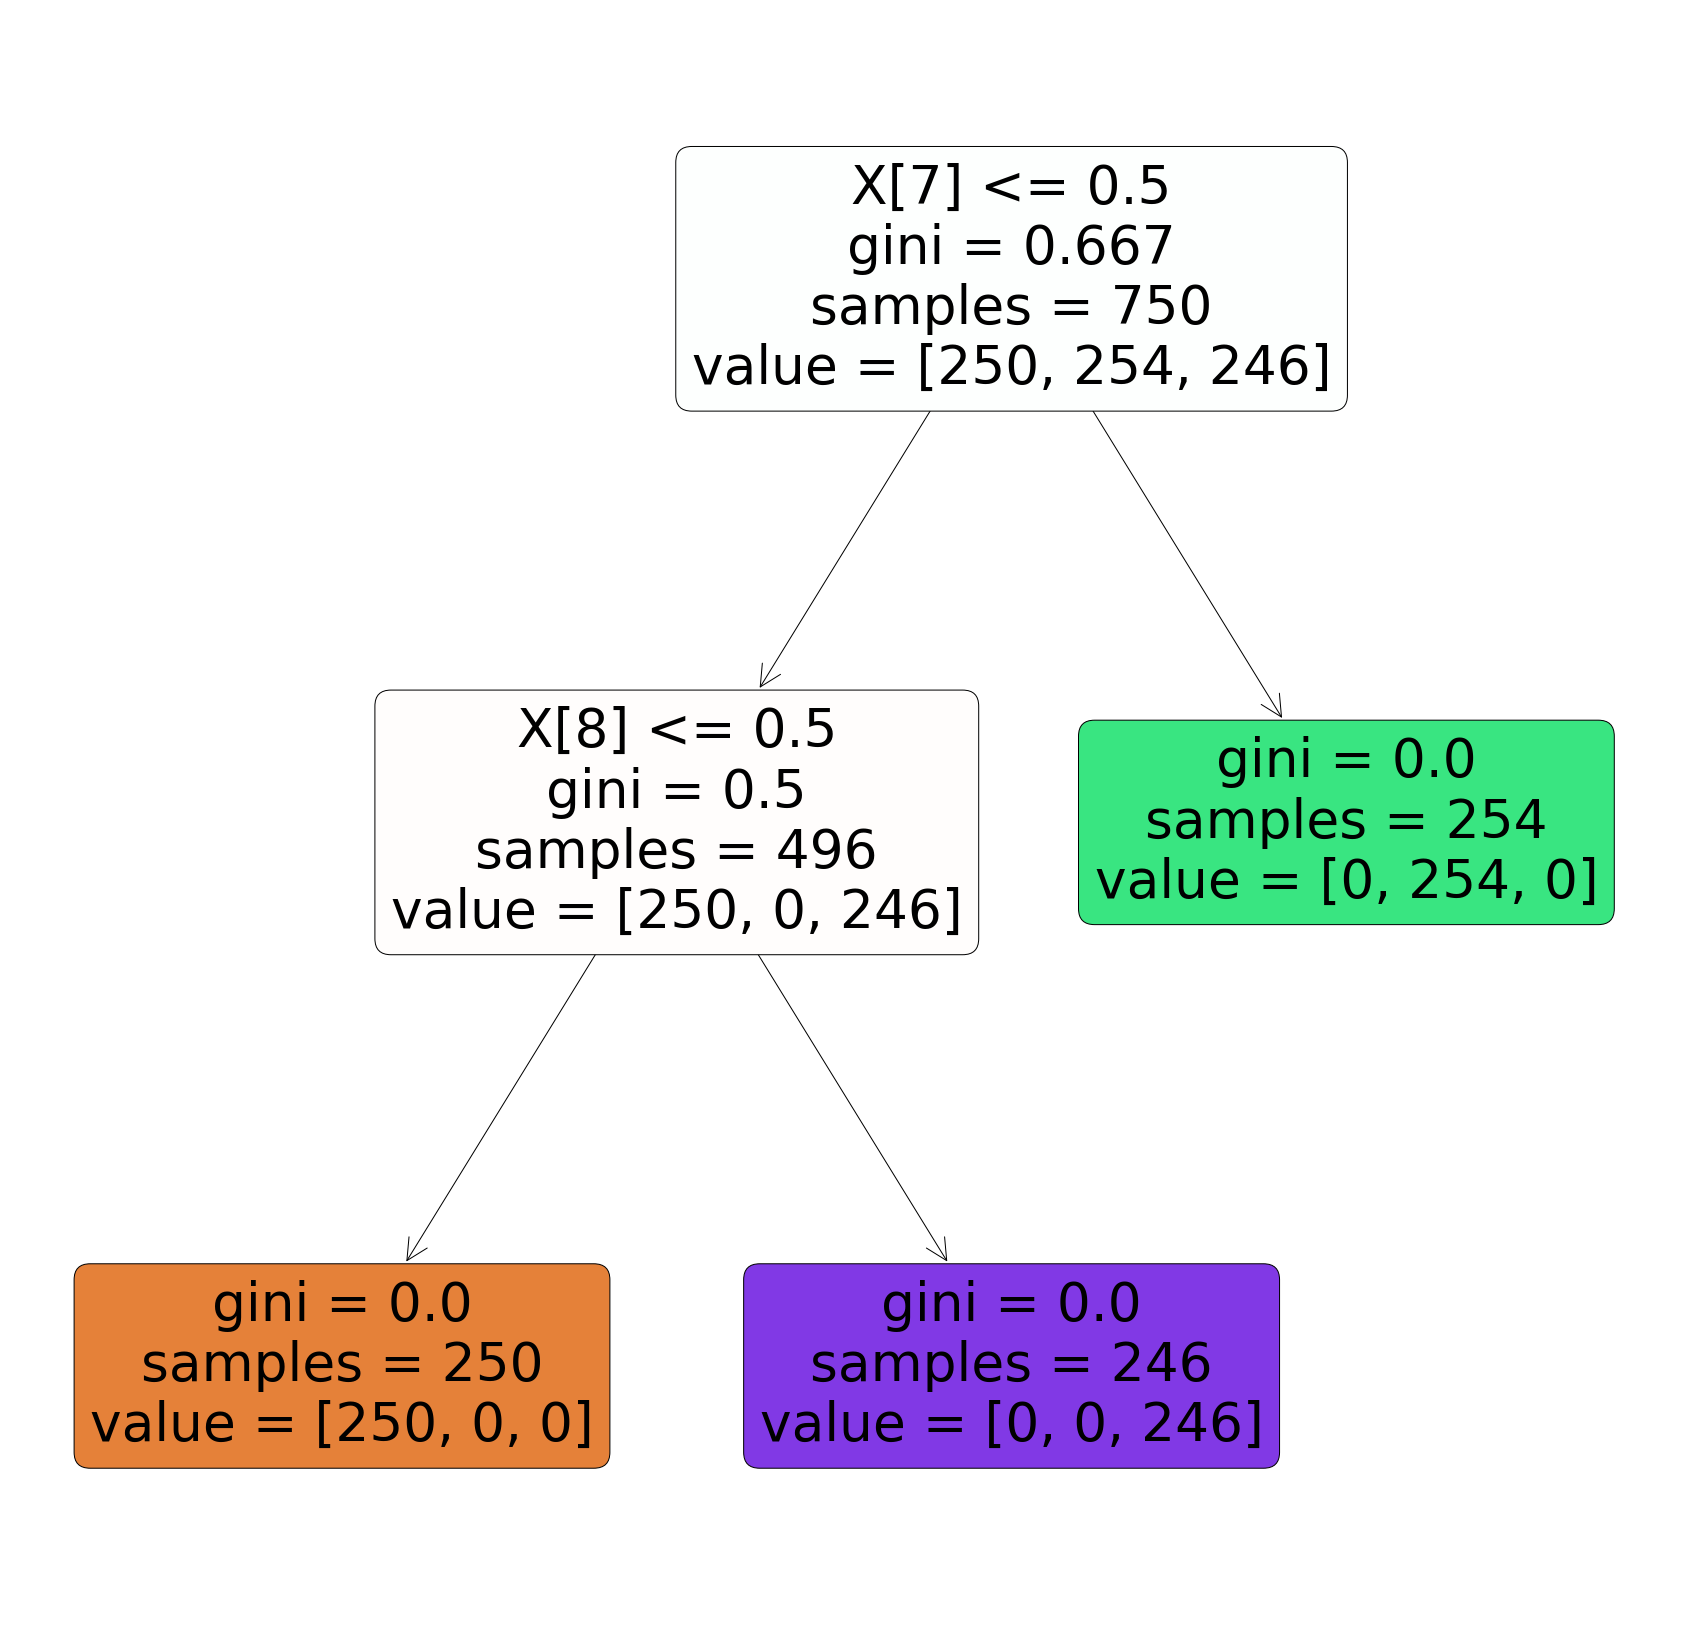

In [186]:
plt.figure(figsize=(30,30))
tree.plot_tree(
    dec_tree,
    rounded=True,
    filled=True)

In [187]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print(cm.ravel())
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

[[90  0  0]
 [ 0 78  0]
 [ 0  0 82]]
[90  0  0  0 78  0  0  0 82]


ValueError: ignored

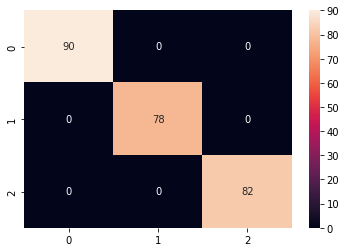

In [188]:
f = sns.heatmap(cm, annot=True)

In [232]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        90
           B       1.00      1.00      1.00        78
           C       1.00      1.00      1.00        82

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

